In [8]:
# from typing import TypedDict, Annotated, Sequence, List
# from langgraph.graph import Graph, StateGraph, END
# from langgraph.prebuilt import ToolExecutor
# from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
# from langchain_core.messages import HumanMessage, AIMessage
# from langchain_openai import ChatOpenAI
# from langchain_community.chat_models import ChatOllama

# # 상태 정의
# class AgentState(TypedDict):
#     messages: Sequence[HumanMessage | AIMessage]
#     todo: List[str]
#     next: str

# # 에이전트 생성 함수
# def create_agent(name: str, system_message: str):
#     prompt = ChatPromptTemplate.from_messages([
#         ("system", system_message),
#         MessagesPlaceholder(variable_name="messages"),
#         ("human", "{input}"),
#     ])
    
#     eeve = ChatOllama(model="EEVE-Korean-Instruct-10.8B-v1.0:latest")
    
#     return prompt | eeve

# # 에이전트 정의
# planner = create_agent("Planner", "You are a task planner. Your job is to break down tasks into steps.")
# executor = create_agent("Executor", "You are a task executor. Your job is to execute the steps provided by the planner.")

# # 그래프 노드 정의
# def plan(state):
#     messages = state['messages']
#     todo = state['todo']
#     response = planner.invoke({"messages": messages, "input": f"Plan the following task: {todo[0]}"})
#     steps = response.content.split('\n')
#     return {"messages": messages + [AIMessage(content=response.content)], "todo": todo[1:] + steps, "next": "execute"}

# def execute(state):
#     messages = state['messages']
#     todo = state['todo']
#     current_task = todo[0]
#     response = executor.invoke({"messages": messages, "input": f"Execute this step: {current_task}"})
#     return {"messages": messages + [AIMessage(content=response.content)], "todo": todo[1:], "next": "check"}

# def check_todo(state):
#     if state['todo']:
#         return "plan" if state['todo'][0].startswith("Task:") else "execute"
#     return "end"

# # 그래프 생성
# workflow = StateGraph(AgentState)

# # 노드 추가
# workflow.add_node("plan", plan)
# workflow.add_node("execute", execute)

# # 엣지 연결
# workflow.add_conditional_edges(
#     "plan",
#     lambda x: "execute",
#     {
#         "execute": "execute",
#     }
# )
# workflow.add_conditional_edges(
#     "execute",
#     check_todo,
#     {
#         "plan": "plan",
#         "execute": "execute",
#         "end": END
#     }
# )

# # 시작점 셋팅
# workflow.set_entry_point("plan")

# # 그래프 컴파일
# app = workflow.compile()

# # 실행
# initial_todo = ["Task: Create a simple Python function to calculate the factorial of a number."]
# inputs = {"messages": [], "todo": initial_todo}

# for output in app.stream(inputs):
#     if END not in output:
#         print(f"Current state: {output}")
#         # print(f"Todo list: {output['todo']}")
#         print(f"Last message: {output['messages'][-1].content}")
#         print("---")
#     else:
#         print("Workflow completed.")
#         print(f"Final state: {output}")
#         for msg in output['messages']:
#             print(f"{msg.type}: {msg.content}")
#             print("---")

Current state: {'plan': {'messages': [AIMessage(content='To create a simple Python function to calculate the factorial of a number, follow these steps:\n\nStep 1: Understand the concept of factorial\nFactorial is a mathematical operation that represents the product of all positive integers less than or equal to a given integer. For example, the factorial of 5 (written as 5!) is calculated by multiplying 1 * 2 * 3 * 4 * 5 = 120.\n\nStep 2: Write the function definition in Python\nIn Python, you can define a function using the `def` keyword followed by the function name and its arguments enclosed in parentheses. The function body should be indented under the function definition.\n\n```python\ndef factorial(n):\n    # Function body goes here\n```\n\nStep 3: Implement the logic to calculate the factorial\nTo calculate the factorial of a number, you can use a loop that starts from 1 and multiplies it with the given number until it reaches 1. The final result will be the product of all these

KeyError: 'messages'

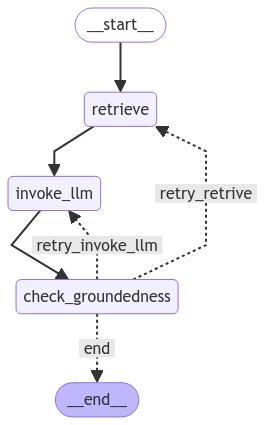

In [14]:
from typing import TypedDict, Annotated, Sequence, List
from langgraph.graph import Graph, StateGraph, END
from langgraph.prebuilt import ToolExecutor
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import HumanMessage, AIMessage
from langchain_openai import ChatOpenAI
from langchain_community.chat_models import ChatOllama
from langchain_core.documents.base import Document

# 상태 정의
class AgentState(TypedDict):
    context: Sequence[Document]
    answer: str
    question: str
    groundness_status: str

def retrieve(state: AgentState) -> AgentState:
    docs = []
    return AgentState(context=docs)

def invoke_llm(state: AgentState) -> AgentState:
    answer = ""
    return AgentState(answer=answer)
    
def check_groundedness(state: AgentState) -> AgentState:
    groundness_status = ""
    return AgentState(groundness_status=groundness_status)
    
def decision(state: AgentState) -> str:
    # retry_retrive, retry_invoke_llm, end
    decision = "end"
    return decision

# 그래프 생성
workflow = StateGraph(AgentState)

# 노드 추가
workflow.add_node("retrieve", retrieve)
workflow.add_node("invoke_llm", invoke_llm)
workflow.add_node("check_groundedness", check_groundedness)

# 엣지 연결
workflow.add_edge("retrieve", "invoke_llm")
workflow.add_edge("invoke_llm", "check_groundedness")
workflow.add_conditional_edges(
    "check_groundedness",
    decision,
    {
        "retry_retrive": "retrieve",
        "retry_invoke_llm": "invoke_llm",
        "end": END
    }
)

# 시작점 셋팅
workflow.set_entry_point("retrieve")

# 그래프 컴파일
app = workflow.compile()

from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except:
    pass